In [32]:
import pandas as pd


In [33]:
sp_df = pd.read_csv("/content/Student_performance_data.csv")
sp_df.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


Student ID

StudentID: A unique identifier assigned to each student (1001 to 3392).

Demographic Details

Age: The age of the students ranges from 15 to 18 years.

Gender: Gender of the students, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the students, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other

ParentalEducation: The education level of the parents, coded as follows:

0: None
1: High School
2: Some College
3: Bachelor's
4: Higher


Study Habits
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.

Absences: Number of absences during the school year, ranging from 0 to 30.

Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

Parental Involvement
ParentalSupport: The level of parental support, coded as follows:
0: None
1: Low
2: Moderate
3: High
4: Very High

Extracurricular Activities
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.

Sports: Participation in sports, where 0
indicates No and 1 indicates Yes.

Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.

Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

Academic Performance
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

Target Variable:
Grade Class
GradeClass: Classification of students' grades based on GPA:
0: 'A' (GPA >= 3.5)
1: 'B' (3.0 <= GPA < 3.5)
2: 'C' (2.5 <= GPA < 3.0)
3: 'D' (2.0 <= GPA < 2.5)
4: 'F' (GPA < 2.0)

StudentID
student_id


Age
age


Gender
gender


Ethnicity
ethnicity


Pare

In [34]:
sp_df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [35]:
sp_df.shape

(2392, 15)

In [36]:
sp_df["Gender"].apply(lambda x: "Male" if x == 0 else "Female").value_counts()

,count
Gender,
Female,1222
Male,1170


<Axes: ylabel='count'>

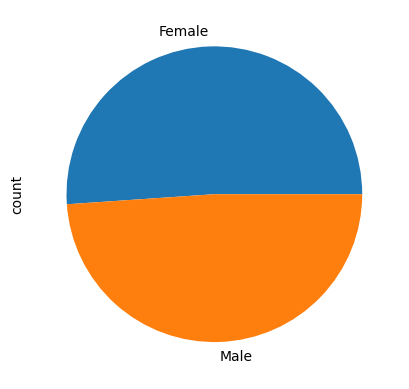

In [37]:
sp_df["Gender"].apply(lambda x: "Male" if x == 0 else "Female").value_counts().plot(kind="pie")

In this dataset , male and female counts percentage are similar, which the dataset well balanced in terms of gender.

In [38]:
sp_df["Ethnicity"].value_counts().reset_index()

,Ethnicity,count
0,0,1207
1,1,493
2,2,470
3,3,222


<Axes: xlabel='Ethnicity'>

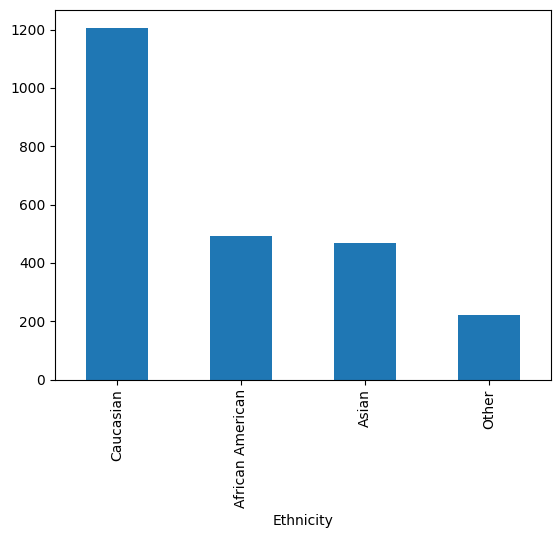

In [39]:
sp_df["Ethnicity"].apply(
    lambda v : ("Caucasian" , "African American" , "Asian" , "Other")[v]
).value_counts().plot(kind="bar")

<Axes: ylabel='count'>

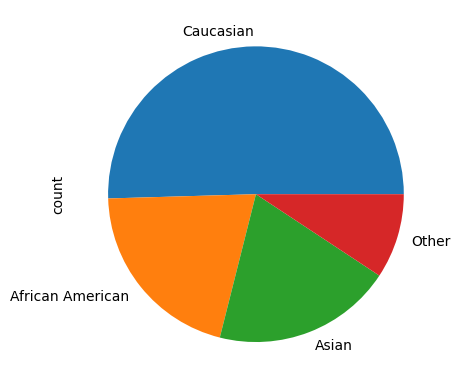

In [40]:
sp_df["Ethnicity"].apply(
    lambda v : ("Caucasian" , "African American" , "Asian" , "Other")[v]
).value_counts().plot(kind="pie")

Majority of the students are from 'Caucasian' enthnic group, they are approximatley 50% of the population.  African American's the next magority followed by Asian followed 'Other' Ethnithic group.

<Axes: xlabel='ParentalSupport'>

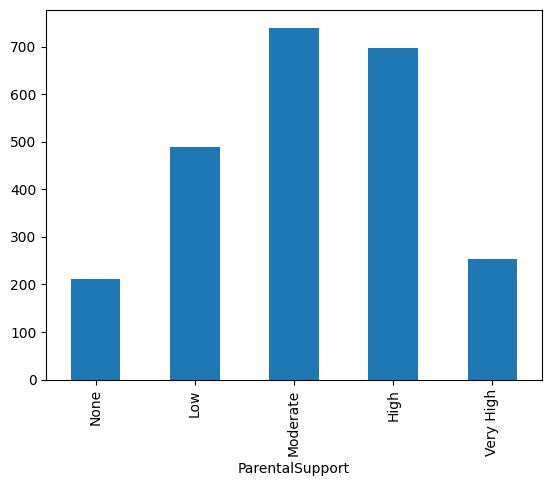

In [41]:

sp_df["ParentalSupport"].apply(
    lambda v : ("None" , "Low" , "Moderate" , "High" , "Very High")[v]
).value_counts()\
.reindex(("None" , "Low" , "Moderate" , "High" , "Very High"))\
.plot(kind="bar")


<Axes: ylabel='Frequency'>

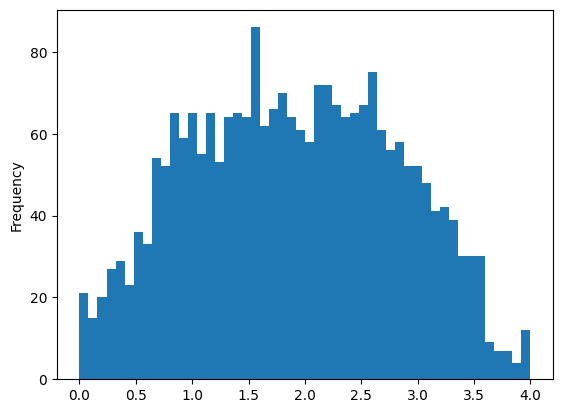

In [42]:
sp_df["GPA"].plot(kind="hist" , bins = 50 )

### BI Variate Analysis

In [43]:

sp_df.columns

Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

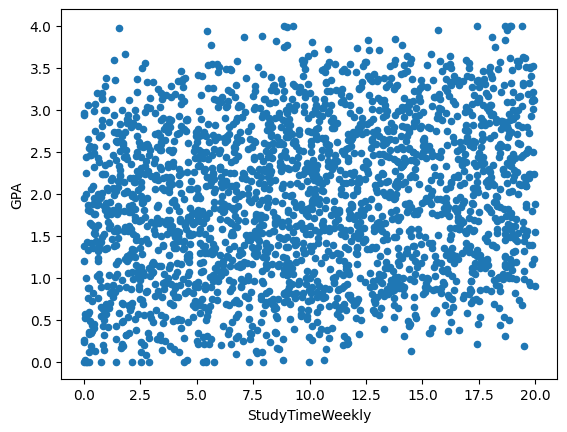

In [44]:
sp_df[["StudyTimeWeekly", "GPA"]].plot(kind="scatter" , x = "StudyTimeWeekly" , y = "GPA")

### MultiVariate Analysis

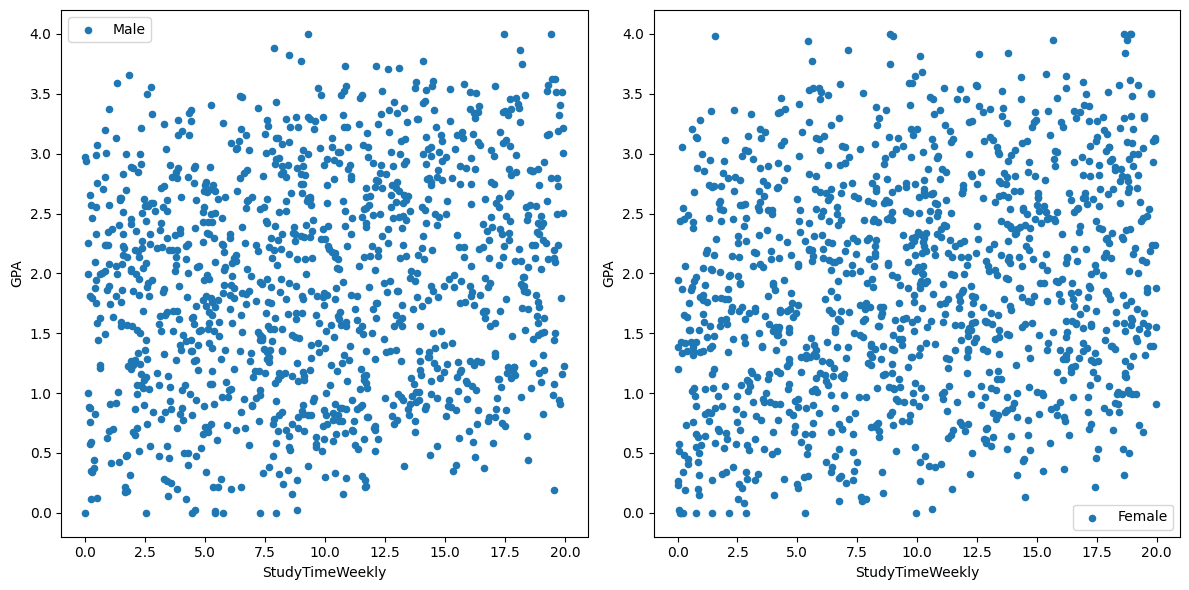

In [45]:
import matplotlib
import matplotlib.pyplot as plt # Import pyplot explicitly

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) # Store figure and axes in separate variables

sp_male_df = sp_df[sp_df["Gender"] == 0]

# Plot on the first axes object
sp_male_df[["StudyTimeWeekly", "GPA"]].plot(kind="scatter" , x = "StudyTimeWeekly" , y = "GPA" , label="Male", ax=axes[0])


sp_female_df = sp_df[sp_df["Gender"] == 1] # Filter for female students (Gender == 1)

# Plot on the second axes object
sp_female_df[["StudyTimeWeekly", "GPA"]].plot(kind="scatter" , x = "StudyTimeWeekly" , y = "GPA" , label="Female", ax=axes[1])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plot

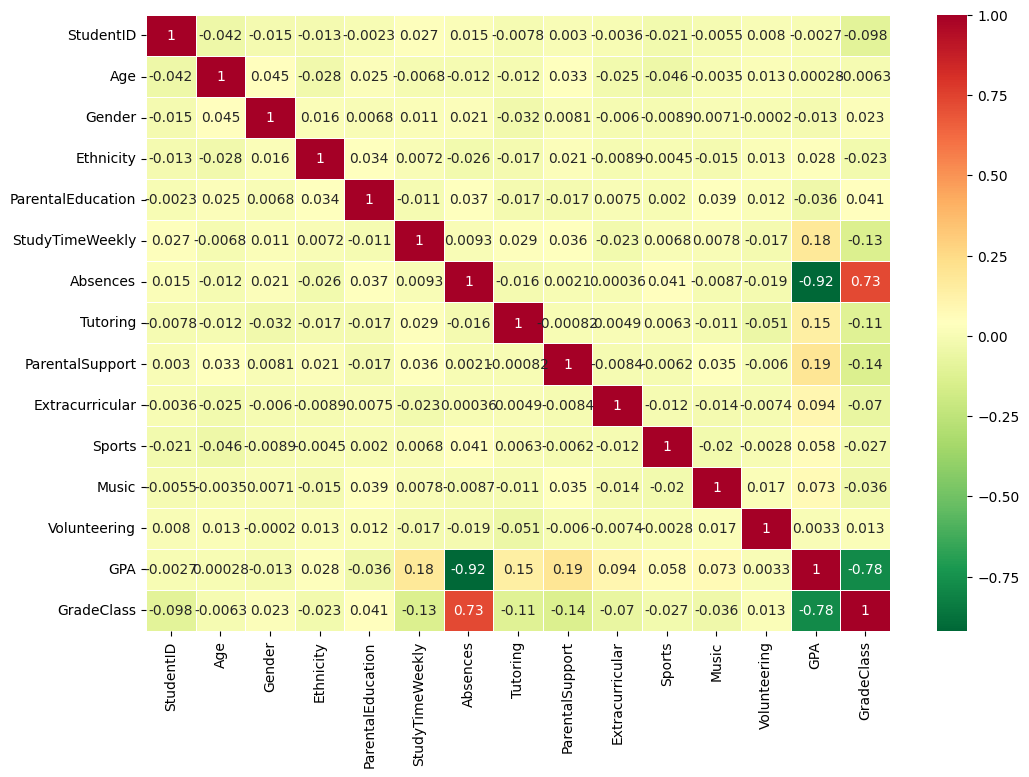

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(sp_df.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True)
plt.show()

### Regression

In [47]:
#prepare the data
sp_df.head()
sp_df_reg = sp_df.drop(columns=["StudentID", "GradeClass"])
sp_df_reg

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297


In [48]:
#train test split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    sp_df_reg.drop(columns=["GPA"]),
    sp_df_reg["GPA"],
    test_size=0.3,
    random_state=42
)

In [49]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1674, 12), (1674,), (718, 12), (718,))

#### Multiple Linear Regression

In [50]:
# normailze the X_train , X_train
from sklearn.preprocessing import StandardScaler  , MinMaxScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (1674, 12)
X_test_scaled shape: (718, 12)


In [51]:
X_train_scaled

array([[ 1.3705733 ,  0.9694045 ,  1.10041004, ...,  1.50861842,
        -0.49738511,  2.33737469],
       [-1.30764425, -1.03156113,  1.10041004, ..., -0.66285814,
        -0.49738511, -0.42783042],
       [-1.30764425,  0.9694045 ,  0.12935764, ..., -0.66285814,
        -0.49738511, -0.42783042],
       ...,
       [-0.41490507,  0.9694045 , -0.84169477, ...,  1.50861842,
        -0.49738511, -0.42783042],
       [ 1.3705733 , -1.03156113,  2.07146245, ..., -0.66285814,
        -0.49738511, -0.42783042],
       [ 1.3705733 , -1.03156113,  0.12935764, ..., -0.66285814,
        -0.49738511, -0.42783042]])

In [52]:
#fit linear regression

from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the scaled test data
y_pred = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 0.1546653395301938
Mean Squared Error (MSE): 0.037409464255231124
R-squared (R2) Score: 0.9555724683640937


In [54]:
student_data = {
    'Age': 16,
    'Gender': 0, # Female
    'Ethnicity': 0, # Caucasian
    'ParentalEducation': 3, # Bachelor's
    'StudyTimeWeekly': 20,
    'Absences': 20,
    'Tutoring': 0, # Yes
    'ParentalSupport': 4, # Very High
    'Extracurricular': 1, # Yes
    'Sports': 0, # No
    'Music': 1, # Yes
    'Volunteering': 0, # No
}


  # Create a DataFrame from the input data
input_df = pd.DataFrame([student_data])

# Ensure the input columns are in the same order as the training data
input_df = input_df[X_train.columns]

# Scale the input data
scaled_input = scaler.transform(input_df)

# Make the prediction
prediction = linear_reg_model.predict(scaled_input)

prediction[0]

np.float64(2.0475944376690762)

#### Multiple Linear Regression



#### Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Fit Decision Tree Regressor
dt_reg_model = DecisionTreeRegressor(random_state=42) # Added random_state for reproducibility
dt_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_dt = dt_reg_model.predict(X_test_scaled)

# Evaluate the Decision Tree Regressor model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"R-squared (R2) Score: {r2_dt}")

# Example prediction with Decision Tree Regressor
# Scale the same input data used for Linear Regression
scaled_input_dt = scaler.transform(input_df)

# Make the prediction with the Decision Tree Regressor
prediction_dt = dt_reg_model.predict(scaled_input_dt)

print(f"\nDecision Tree Regressor prediction for the example student: {prediction_dt[0]}")

Decision Tree Regressor Metrics:
Mean Absolute Error (MAE): 0.2769592065573749
Mean Squared Error (MSE): 0.12388561000892868
R-squared (R2) Score: 0.8528732777258206

Decision Tree Regressor prediction for the example student: 1.722115750240589


#### Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest Regressor
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42) # Added random_state for reproducibility
rf_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_rf = rf_reg_model.predict(X_test_scaled)

# Evaluate the Random Forest Regressor model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Metrics:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2) Score: {r2_rf}")

# Example prediction with Random Forest Regressor
# Scale the same input data used before
scaled_input_rf = scaler.transform(input_df)

# Make the prediction with the Random Forest Regressor
prediction_rf = rf_reg_model.predict(scaled_input_rf)

print(f"\nRandom Forest Regressor prediction for the example student: {prediction_rf[0]}")

Random Forest Regressor Metrics:
Mean Absolute Error (MAE): 0.19077574758201737
Mean Squared Error (MSE): 0.058414100308833726
R-squared (R2) Score: 0.9306273334537043

Random Forest Regressor prediction for the example student: 1.743549094400794


### Classifcation

In [57]:
sp_df_cls = sp_df.drop(columns=["StudentID", "GPA"])
sp_df_cls

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.0
